## Import Package

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [32]:
data = pd.read_csv('/content/online_course_engagement_data.csv')

## Data Exploration

In [33]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [34]:
data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [36]:
data[numerical_features].describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [8]:
data[categorical_features].astype('object').describe(include='all')

,CourseCategory,UserID,DeviceType,CourseCompletion
count,9000,9000,9000,9000
unique,5,8123,2,2
top,Business,7790,1,0
freq,1837,2,4506,5432


### Proportion Course Completion

In [30]:
round(data['CourseCompletion'].value_counts(normalize=True) * 100, 2)

,proportion
CourseCompletion,
0,60.36
1,39.64


### Distribution of Time Spent on Course

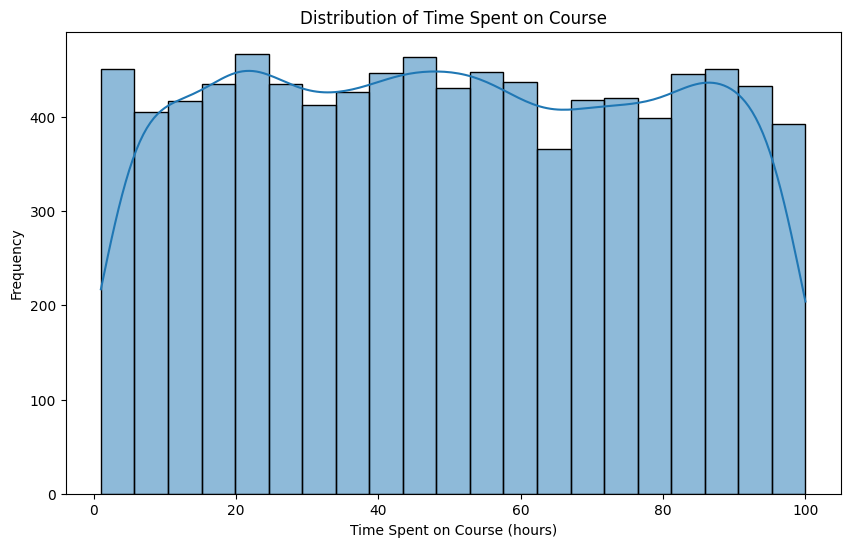

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TimeSpentOnCourse'], kde=True)
plt.title('Distribution of Time Spent on Course')
plt.xlabel('Time Spent on Course (hours)')
plt.ylabel('Frequency')
plt.show()

### Completion Rate by Course Category

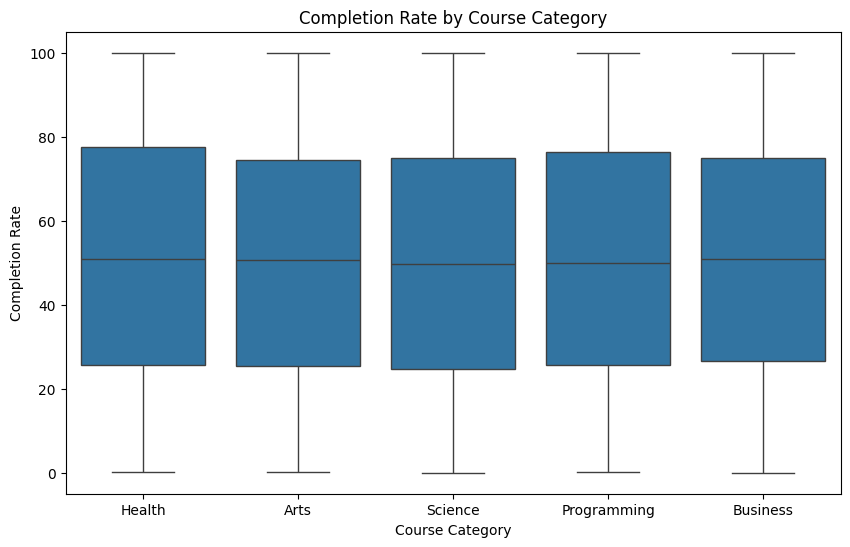

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CourseCategory', y='CompletionRate', data=data)
plt.title('Completion Rate by Course Category')
plt.xlabel('Course Category')
plt.ylabel('Completion Rate')
plt.show()

### Course Completion by Device Type

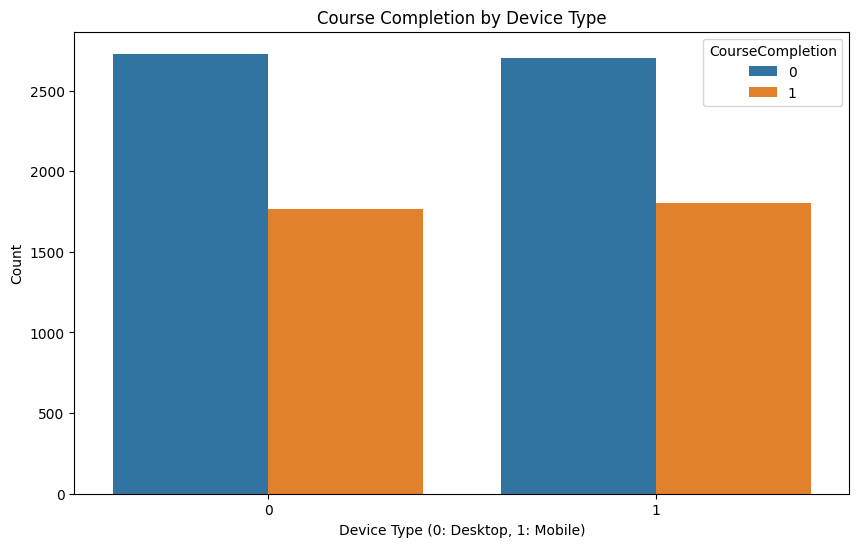

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceType', hue='CourseCompletion', data=data)
plt.title('Course Completion by Device Type')
plt.xlabel('Device Type (0: Desktop, 1: Mobile)')
plt.ylabel('Count')
plt.show()

### Time Spent on Course vs. Completion Rate

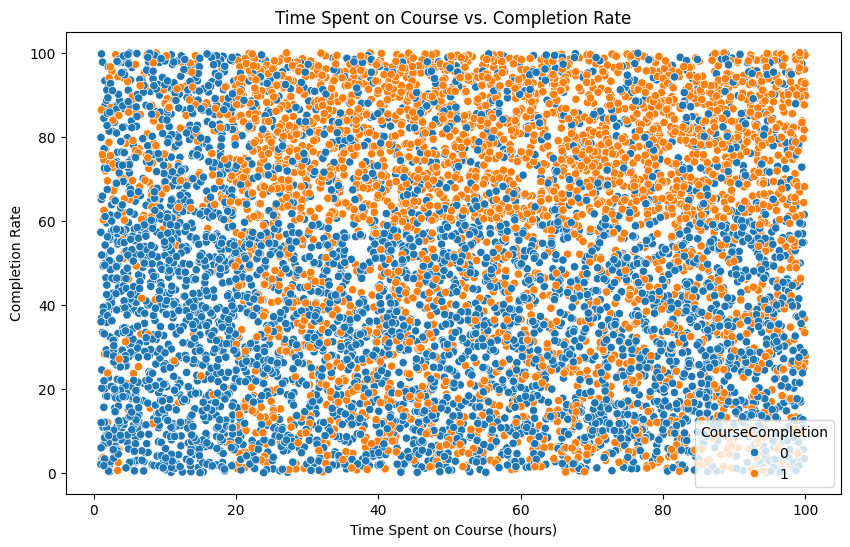

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TimeSpentOnCourse', y='CompletionRate', hue='CourseCompletion', data=data)
plt.title('Time Spent on Course vs. Completion Rate')
plt.xlabel('Time Spent on Course (hours)')
plt.ylabel('Completion Rate')
plt.show()

### Correlation Matrix

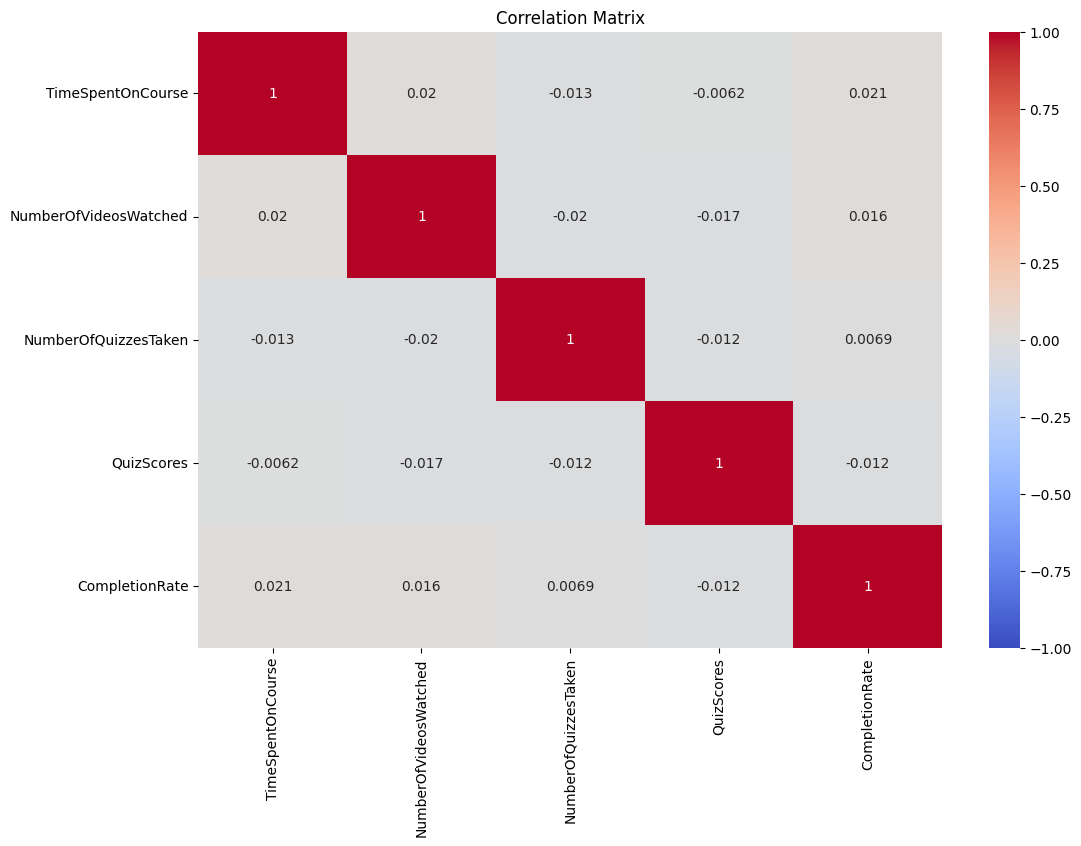

In [28]:
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## Data Preparation

In [37]:
data.drop('UserID', axis=1, inplace=True)

### Label Encoding

In [39]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

data = data.join(encoded_data)
data = data.drop(categorical_features, axis=1)
data.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,29.979719,17,3,50.365656,20.860773,1,0,0.0,0.0,1.0,0.0,0.0
1,27.802640,1,5,62.615970,65.632415,1,0,1.0,0.0,0.0,0.0,0.0
2,86.820485,14,2,78.458962,63.812007,1,1,1.0,0.0,0.0,0.0,0.0
3,35.038427,17,10,59.198853,95.433162,0,1,0.0,0.0,0.0,0.0,1.0
4,92.490647,16,0,98.428285,18.102478,0,0,0.0,0.0,0.0,1.0,0.0


### Data Split

In [40]:
X = data.drop(["CourseCompletion"],axis =1)
y = data["CourseCompletion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Standarisasi

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)

In [42]:
X_train.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
5292,-0.217476,-0.831284,0.277279,1.610431,1.317495,-1.008929,2.046294,-0.504553,-0.502820,-0.499783,-0.50412
8444,0.456316,-0.665008,-1.301658,1.103239,-0.524981,-1.008929,-0.488688,1.981951,-0.502820,-0.499783,-0.50412
5511,-1.708794,-1.662659,-0.038509,0.963403,0.026371,-1.008929,-0.488688,-0.504553,1.988785,-0.499783,-0.50412
8328,0.596577,0.997743,-0.038509,0.304580,-1.302501,0.991150,-0.488688,-0.504553,-0.502820,2.000868,-0.50412
6637,-0.836006,-1.163834,-0.354296,0.684815,-1.388762,0.991150,-0.488688,1.981951,-0.502820,-0.499783,-0.50412


In [43]:
X_test[X_test.columns] = scaler.transform(X_test)

In [44]:
X_test.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
3215,-0.051139,0.000092,0.908854,1.292473,1.318747,-1.008929,-0.488688,-0.504553,1.988785,-0.499783,-0.504120
7216,-0.029579,-1.496384,-0.354296,-0.705008,0.302782,0.991150,-0.488688,-0.504553,-0.502820,-0.499783,1.983655
157,-1.618412,0.831468,0.277279,-0.681015,-1.021536,0.991150,-0.488688,-0.504553,1.988785,-0.499783,-0.504120
4574,-0.944618,0.332643,0.908854,-1.495904,0.373226,-1.008929,-0.488688,-0.504553,1.988785,-0.499783,-0.504120
3779,-1.604954,0.831468,0.593066,-1.539773,0.082778,0.991150,2.046294,-0.504553,-0.502820,-0.499783,-0.504120


## Model Development

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['KNN', 'DecisionTree', 'RandomForest', 'Boosting'])

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

models.loc['train_accuracy','KNN'] = accuracy_score(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['test_accuracy','KNN'] = accuracy_score(y_pred = knn.predict(X_test), y_true=y_test)

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
models.loc['train_accuracy','DecisionTree'] = accuracy_score(y_pred = dt.predict(X_train), y_true=y_train)
models.loc['test_accuracy','DecisionTree'] = accuracy_score(y_pred = dt.predict(X_test), y_true=y_test)

In [52]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
models.loc['train_accuracy','RandomForest'] = accuracy_score(y_pred = rf.predict(X_train), y_true=y_train)
models.loc['test_accuracy','RandomForest'] = accuracy_score(y_pred = rf.predict(X_test), y_true=y_test)

In [50]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
models.loc['train_accuracy','Boosting'] = accuracy_score(y_pred = gb.predict(X_train), y_true=y_train)
models.loc['test_accuracy','Boosting'] = accuracy_score(y_pred = gb.predict(X_test), y_true=y_test)

In [58]:
models

,KNN,DecisionTree,RandomForest,Boosting
train_accuracy,0.922361,1.0,0.999861,0.961667
test_accuracy,0.853333,0.925556,0.962778,0.959444


In [57]:
importances = gb.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
3,QuizScores,0.259075
4,CompletionRate,0.227334
2,NumberOfQuizzesTaken,0.218364
1,NumberOfVideosWatched,0.169483
0,TimeSpentOnCourse,0.125386
10,CourseCategory_Science,0.000339
5,DeviceType,0.000019
6,CourseCategory_Arts,0.000000
7,CourseCategory_Business,0.000000
8,CourseCategory_Health,0.000000
